<a href="https://colab.research.google.com/github/KU-ZHANGZIYUE/RainfallForecasting_ConvEncDec/blob/main/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Preparation
#Author: ZHANG Ziyue (Kyoto University)
#Date: 2011/11/1

from google.colab import drive
drive.mount('/content/drive/')    
%cd /content/drive/MyDrive/Research/Data/20180704

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Research/Data/20180704


In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/drive/MyDrive/Research/Data/20180704/conv_npy'
save_dir = '/content/drive/MyDrive/Research/Prepared_Data'

In [ ]:
path = glob.glob(base_dir + '/*npy')     #for locating the path of the target files
path = [path[i] for i in range(len(path)) if i % 5 == 0]    #5 minutes interval
print(len(path))

109


In [ ]:
channels = 3                                                     #Taking 3 frames as input 
single_ch_ds = np.zeros((len(path), 180, 120, 1))                #Creating a nparray 3 dimension, first one indicates # sets of inputs
dataset = np.zeros((len(path)- 2 - 6, 180, 120, channels))      #Creating another box which takes information from single channel datasets, we will copy things in this dataset
                                                                 # i = 0,...,last-2, here-2是因为我们选取3个frame，最后3个frame会被放在一起（倒数第3,2,1个），如果再往后的话就是倒数第2个，第1个，没了！所以不行
                                                                 # 再-6是因为我们要用6*5=30分钟前的data去predict30分钟后的，所以
output = np.zeros((len(path)- 2 - 6, 180, 120, 1))                #对于output，我们只有一个channel，但是为了和input对齐，需要再加一个dimension, 不然input4个dim，output3个dim

for i in range(len(path)):                                        # i = 0,...,81 一共82个，range即0-81
    single_ch_ds[i,:,:,0] = np.load(path[i])                      #At this moment, each single frame is a input in the dataset, and only 1st channel is assigned with a data, 2nd and 3ed remains 0

for i in range(len(path)- 2 - 6):    
    k = i
    for j in range(channels):     # j = 0,1,2
        #print(k)   should give 0,1,2;   1,2,3;   2,3,4; 
        dataset[i,:,:,j] = single_ch_ds[k,:,:,0]                 #See sticky note for expected structure
        k = k + 1


for i in range(len(path) - 2 - 6):
    k = i + 2 + 6
    output[i,:,:,0] = single_ch_ds[k,:,:,0]

In [ ]:
print(np.shape(single_ch_ds))
print(np.shape(dataset))
print(np.shape(output))

(97, 180, 120, 1)
(89, 180, 120, 3)
(89, 180, 120, 1)


In [ ]:
np.save(save_dir+'/20190703input.npy', dataset)
np.save(save_dir+'/20190703output.npy', output)

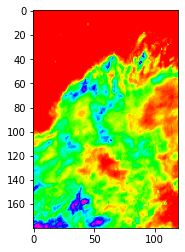

In [ ]:
plt.imshow(output[40,:,:,0], cmap = 'hsv')

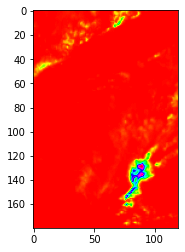

In [ ]:
plt.imshow(dataset[48,:,:,0], cmap = 'hsv')

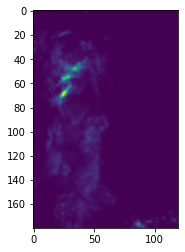

In [ ]:
plt.imshow(dataset[6,:,:,2])

In [ ]:
np.array_equal(output[0,:,:,0],dataset[6,:,:,2])

True